## Creando una RBM para MNIST

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

### Conjunto de datos

Data shape: (1797, 8, 8), Target shape: (1797,)


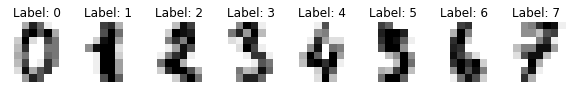

In [2]:
digits = datasets.load_digits()

def drawDataSet(X, y):
    _, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Label: %i" % label)
        
print(f'Data shape: {digits.images.shape}, Target shape: {digits.target.shape}')
drawDataSet(digits.images, digits.target)

### Transformando los datos

In [3]:
X , y = digits.images, digits.target

X = X.reshape((-1,64))
print(X.shape)

X /= 255.0

(1797, 64)


### Particionado de datos

X_train shape: (1347, 64), X_test shape: (450, 64)


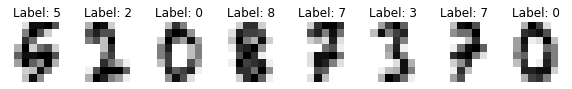

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
drawDataSet(X_train.reshape((-1,8,8)), y_train)

In [5]:
%run "./RBM.py"

Epoch 1 ==> Loss: 0.5025959930750179
Epoch 2 ==> Loss: 0.009278690281591768
Epoch 3 ==> Loss: 0.019239687486709896
Epoch 4 ==> Loss: 0.03972115865721225
Epoch 5 ==> Loss: 0.007980462193028951
Epoch 6 ==> Loss: 0.008487352959729097
Epoch 7 ==> Loss: 0.013909305519520649
Epoch 8 ==> Loss: 0.01068377347299751
Epoch 9 ==> Loss: 0.012966442294052286
Epoch 10 ==> Loss: 0.015050412481978978
Epoch 11 ==> Loss: 0.014271493824686808
Epoch 12 ==> Loss: 0.015597152150377889
Epoch 13 ==> Loss: 0.016544200420316898
Epoch 14 ==> Loss: 0.0152484742605137
Epoch 15 ==> Loss: 0.01875144746167241
Epoch 16 ==> Loss: 0.015454724169534473
Epoch 17 ==> Loss: 0.01994040949786031
Epoch 18 ==> Loss: 0.017826279695976676
Epoch 19 ==> Loss: 0.020221535311214605
Epoch 20 ==> Loss: 0.016363424695030493
Epoch 21 ==> Loss: 0.018884277134001627
Epoch 22 ==> Loss: 0.01838220826636549
Epoch 23 ==> Loss: 0.018888325709630838
Epoch 24 ==> Loss: 0.0181962922147184
Epoch 25 ==> Loss: 0.019397672915476803
Epoch 26 ==> Loss: 0

Epoch 207 ==> Loss: 0.022210705143958395
Epoch 208 ==> Loss: 0.01619725113577754
Epoch 209 ==> Loss: 0.020248055756066637
Epoch 210 ==> Loss: 0.01827967467683465
Epoch 211 ==> Loss: 0.018707231557047753
Epoch 212 ==> Loss: 0.019907065610936574
Epoch 213 ==> Loss: 0.01815130298665895
Epoch 214 ==> Loss: 0.0191853273982053
Epoch 215 ==> Loss: 0.018743987165007345
Epoch 216 ==> Loss: 0.018416962331317375
Epoch 217 ==> Loss: 0.018647640162954858
Epoch 218 ==> Loss: 0.019428241935958046
Epoch 219 ==> Loss: 0.017184330265870563
Epoch 220 ==> Loss: 0.020553609492037637
Epoch 221 ==> Loss: 0.01721385302523414
Epoch 222 ==> Loss: 0.020573533942887023
Epoch 223 ==> Loss: 0.017968753166433905
Epoch 224 ==> Loss: 0.020375244716283242
Epoch 225 ==> Loss: 0.017544608007256646
Epoch 226 ==> Loss: 0.01855115669206093
Epoch 227 ==> Loss: 0.01963849493099422
Epoch 228 ==> Loss: 0.017731251892724714
Epoch 229 ==> Loss: 0.019582815643689095
Epoch 230 ==> Loss: 0.018968069002642182
Epoch 231 ==> Loss: 0.01

Epoch 415 ==> Loss: 0.018129558951257112
Epoch 416 ==> Loss: 0.01965236926320669
Epoch 417 ==> Loss: 0.01839640102587464
Epoch 418 ==> Loss: 0.01866961164642575
Epoch 419 ==> Loss: 0.018497024051625392
Epoch 420 ==> Loss: 0.02034235572549762
Epoch 421 ==> Loss: 0.017187332580382114
Epoch 422 ==> Loss: 0.01942182790041064
Epoch 423 ==> Loss: 0.01717605115615689
Epoch 424 ==> Loss: 0.021048763938374453
Epoch 425 ==> Loss: 0.01790456732134605
Epoch 426 ==> Loss: 0.01816449497466425
Epoch 427 ==> Loss: 0.019584862676310613
Epoch 428 ==> Loss: 0.017963521860845596
Epoch 429 ==> Loss: 0.018874951763170295
Epoch 430 ==> Loss: 0.019761908253264477
Epoch 431 ==> Loss: 0.01823659601255528
Epoch 432 ==> Loss: 0.01974948958869397
Epoch 433 ==> Loss: 0.018103629871384627
Epoch 434 ==> Loss: 0.018824958677591597
Epoch 435 ==> Loss: 0.01963885884790471
Epoch 436 ==> Loss: 0.017879366075294553
Epoch 437 ==> Loss: 0.01877118995406655
Epoch 438 ==> Loss: 0.01904726642028778
Epoch 439 ==> Loss: 0.0198457

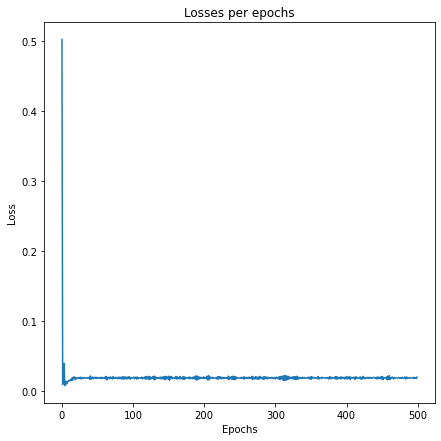

In [9]:
net = RBM(64,50)
history = net.train(X_train, l2_cost, verbose = True)

## showing stats
def plot(losses):
    plt.figure(figsize=(7, 7))
    plt.title('Losses per epochs')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(losses)
    
plot(history)

Text(0.5, 0.98, 'RBM')

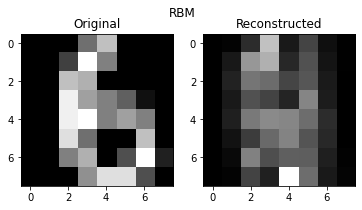

In [14]:
#Testing the network
reconstructed = net.getReconstructedOutput(X_test)

fig, (vax, hax) = plt.subplots(1, 2, figsize=(6, 3))
vax.imshow(X_test.reshape((-1,8,8))[0], cmap='gray')
vax.set_title('Original')
hax.imshow(reconstructed.reshape((-1,8,8))[0], cmap='gray')
hax.set_title('Reconstructed')
plt.suptitle('RBM')